In [1]:
from semantic_router import Route
from semantic_router.encoders import HuggingFaceEncoder
from semantic_router import RouteLayer
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataframes json files
df_synthetic = pd.read_json("synthetic_intetions.json")

X_syn = df_synthetic[['Id','Message']]
y_syn = df_synthetic['Intention'].to_list()

In [3]:
# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_syn, y_syn, test_size=0.25, random_state=42, stratify=y_syn, shuffle=True
)

In [4]:
y_train = [None if y == 'None' else y for y in y_train]
y_test = [None if y == 'None' else y for y in y_test]

In [5]:
order_status_messages = []
create_order_messages = []
product_information_messages = []
support_information_messages = []
update_profile_info_messages = []
insert_new_favorite_author_genre_messages = []
add_book_to_read_list_messages = []
suggest_authors_given_favorites_messages = []
suggest_authors_given_input_messages = []
suggest_books_given_favorites_messages = []
suggest_books_given_input_messages = []
suggest_books_given_trope_messages = []
browse_available_genres_books_authors_messages = []
create_reading_plan_messages = []
recommend_bookstores_per_district_messages = []
ask_about_chatbot_features_messages = []
ask_about_company_info_messages = []

for message, label in zip(X_train["Message"], y_train):
    if label == 'order_status':
        order_status_messages.append(message)
    elif label == 'create_order':
        create_order_messages.append(message)
    elif label == 'product_information':
        product_information_messages.append(message)
    elif label == 'support_information':
        support_information_messages.append(message)
    elif label == 'update_profile_info':
        update_profile_info_messages.append(message)
    elif label == 'insert_new_favorite_author_genre':
        insert_new_favorite_author_genre_messages.append(message)
    elif label == 'add_book_to_read_list':
        add_book_to_read_list_messages.append(message)
    elif label == 'suggest_authors_given_favorites':
        suggest_authors_given_favorites_messages.append(message)
    elif label == 'suggest_authors_given_input':
        suggest_authors_given_input_messages.append(message)
    elif label == 'suggest_books_given_favorites':
        suggest_books_given_favorites_messages.append(message)
    elif label == 'suggest_books_given_input':
        suggest_books_given_input_messages.append(message)
    elif label == 'suggest_books_given_trope':
        suggest_books_given_trope_messages.append(message)
    elif label == 'browse_available_genres_books_authors':
        browse_available_genres_books_authors_messages.append(message)
    elif label == 'create_reading_plan':
        create_reading_plan_messages.append(message)
    elif label == 'recommend_bookstores_per_district':
        recommend_bookstores_per_district_messages.append(message)
    elif label == 'ask_about_chatbot_features':
        ask_about_chatbot_features_messages.append(message)
    elif label == 'ask_about_company_info':
        ask_about_company_info_messages.append(message)


update_profile_info = Route(
    name="update_profile_info",
    description="The user wants to update a specific information about themselves in the platform.",
    utterances=update_profile_info_messages,
)

insert_new_favorite_author_genre = Route(
    name="insert_new_favorite_author_genre",
    description="The user intends to set an author or books genre as part of their favorite list.",
    utterances=insert_new_favorite_author_genre_messages,
)

add_book_to_read_list = Route(
    name="add_book_to_read_list",
    description="The user wants to add a book to their reading list.",
    utterances=add_book_to_read_list_messages,
)

suggest_authors_given_favorites = Route(
    name="suggest_authors_given_favorites",
    description="The user wants to receive suggestions of authors based on their favorite authors.",
    utterances=suggest_authors_given_favorites_messages,
)

suggest_authors_given_input = Route(
    name="suggest_authors_given_input",
    description="The user wants to receive suggestions of authors based on their input.",
    utterances=suggest_authors_given_input_messages,
)

suggest_books_given_favorites = Route(
    name="suggest_books_given_favorites",
    description="The user wants to receive suggestions of books based on their favorite books.",
    utterances=suggest_books_given_favorites_messages,
)

suggest_books_given_input = Route(
    name="suggest_books_given_input",
    description="The user wants to receive suggestions of books based on their input.",
    utterances=suggest_books_given_input_messages,
)

suggest_books_given_trope = Route(
    name="suggest_books_given_trope",
    description="The user wants to receive suggestions of books based on a specific trope.",
    utterances=suggest_books_given_trope_messages,
)

browse_available_genres_books_authors = Route(
    name="browse_available_genres_books_authors",
    description="The user wants to browse available genres, books, and authors.",
    utterances=browse_available_genres_books_authors_messages,
)

create_reading_plan = Route(
    name="create_reading_plan",
    description="The user wants to create a reading plan.",
    utterances=create_reading_plan_messages,
)

recommend_bookstores_per_district = Route(
    name="recommend_bookstores_per_district",
    description="The user wants to receive recommendations for bookstores in their district or another specific.",
    utterances=recommend_bookstores_per_district_messages,
)

ask_about_chatbot_features = Route(
    name="ask_about_chatbot_features",
    description="The user wants to ask about the features of the chatbot.",
    utterances=ask_about_chatbot_features_messages,
)

ask_about_company_info = Route(
    name="ask_about_company_info",
    description="The user wants to ask about the company information.",
    utterances=ask_about_company_info_messages,
)


routes = [
    update_profile_info, insert_new_favorite_author_genre, add_book_to_read_list,
    suggest_authors_given_favorites, suggest_authors_given_input,
    suggest_books_given_favorites, suggest_books_given_input,
    suggest_books_given_trope, browse_available_genres_books_authors,
    create_reading_plan, recommend_bookstores_per_district, ask_about_chatbot_features,
    ask_about_company_info
]

In [6]:
hf_rl = RouteLayer(encoder=HuggingFaceEncoder(), routes=routes, aggregation='sum', top_k=6) #aggregation = "mean", "max" or "sum". #top_k = 5

In [7]:
# Call the fit method
hf_rl.fit(X=X_train["Message"].to_list(), y=y_train, max_iter=25)

Generating embeddings:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/25 [00:00<?, ?it/s]

In [8]:
accuracy = hf_rl.evaluate(X=X_train["Message"].to_list(), y=y_train)
print(f"Train Accuracy: {accuracy*100:.2f}%")
accuracy = hf_rl.evaluate(X=X_test["Message"].to_list(), y=y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Generating embeddings:   0%|          | 0/2 [00:00<?, ?it/s]

Train Accuracy: 90.21%


Generating embeddings:   0%|          | 0/1 [00:00<?, ?it/s]

Test Accuracy: 83.51%


In [9]:
pred_train = []
pred_test = []
for i in range(len(X_train)):
    pred_train.append(hf_rl(X_train.iloc[i].Message).name)
for i in range(len(X_test)):
    pred_test.append(hf_rl(X_test.iloc[i].Message).name)

In [10]:
intent_counts = defaultdict(int)  # Total samples per intent
correct_counts = defaultdict(int)  # Correct predictions per intent

for pred, true in zip(pred_train, y_train):
    intent_counts[true] += 1
    if pred == true:
        correct_counts[true] += 1

intent_accuracies = {}
for intent, total in intent_counts.items():
    correct = correct_counts[intent]
    accuracy = correct / total if total > 0 else 0
    intent_accuracies[intent] = accuracy

for intent, accuracy in intent_accuracies.items():
    print(f"Accuracy for {intent}: {accuracy:.2f}")

Accuracy for suggest_books_given_favorites: 1.00
Accuracy for ask_about_chatbot_features: 1.00
Accuracy for add_book_to_read_list: 1.00
Accuracy for ask_about_company_info: 1.00
Accuracy for suggest_books_given_input: 0.55
Accuracy for suggest_authors_given_input: 0.69
Accuracy for None: 0.92
Accuracy for suggest_authors_given_favorites: 0.95
Accuracy for browse_available_genres_books_authors: 0.74
Accuracy for insert_new_favorite_author_genre: 1.00
Accuracy for create_reading_plan: 1.00
Accuracy for suggest_books_given_trope: 0.77
Accuracy for recommend_bookstores_per_district: 1.00
Accuracy for update_profile_info: 1.00


C:\Users\mnasc\AppData\Local\Temp\ipykernel_34120\840904750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=intents, palette="viridis")


<Axes: >

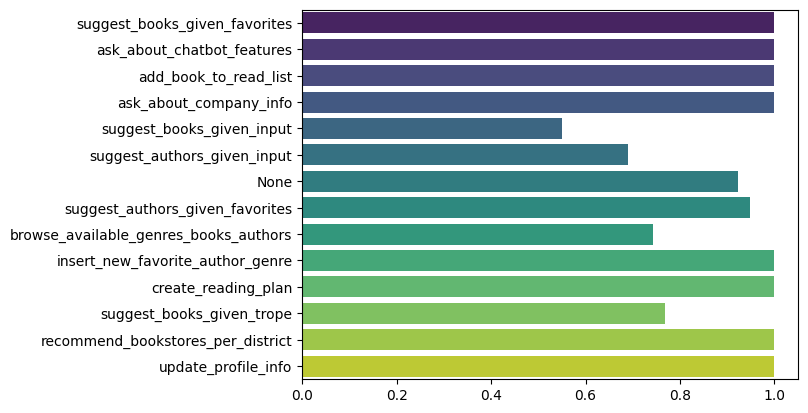

In [11]:
intents = list(intent_accuracies.keys())
intents = [intent if intent is not None else "None" for intent in intents]
accuracies = list(intent_accuracies.values())

sns.barplot(x=accuracies, y=intents, palette="viridis")

In [12]:
intent_counts = defaultdict(int)  # Total samples per intent
correct_counts = defaultdict(int)  # Correct predictions per intent

for pred, true in zip(pred_test, y_test):
    intent_counts[true] += 1
    if pred == true:
        correct_counts[true] += 1

intent_accuracies = {}
for intent, total in intent_counts.items():
    correct = correct_counts[intent]
    accuracy = correct / total if total > 0 else 0
    intent_accuracies[intent] = accuracy

for intent, accuracy in intent_accuracies.items():
    print(f"Accuracy for {intent}: {accuracy:.2f}")

Accuracy for ask_about_company_info: 1.00
Accuracy for insert_new_favorite_author_genre: 1.00
Accuracy for suggest_books_given_input: 0.07
Accuracy for create_reading_plan: 1.00
Accuracy for suggest_books_given_favorites: 0.92
Accuracy for browse_available_genres_books_authors: 0.62
Accuracy for suggest_authors_given_input: 0.36
Accuracy for None: 0.92
Accuracy for suggest_authors_given_favorites: 1.00
Accuracy for suggest_books_given_trope: 0.85
Accuracy for recommend_bookstores_per_district: 1.00
Accuracy for ask_about_chatbot_features: 1.00
Accuracy for add_book_to_read_list: 1.00
Accuracy for update_profile_info: 1.00


C:\Users\mnasc\AppData\Local\Temp\ipykernel_34120\840904750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=intents, palette="viridis")


<Axes: >

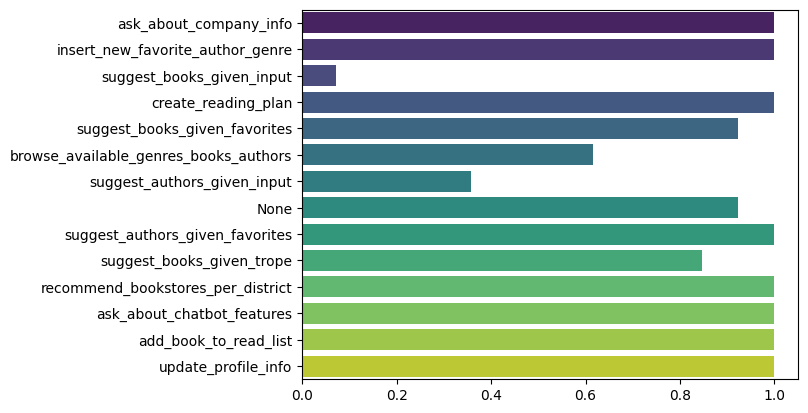

In [13]:
intents = list(intent_accuracies.keys())
intents = [intent if intent is not None else "None" for intent in intents]
accuracies = list(intent_accuracies.values())

sns.barplot(x=accuracies, y=intents, palette="viridis")

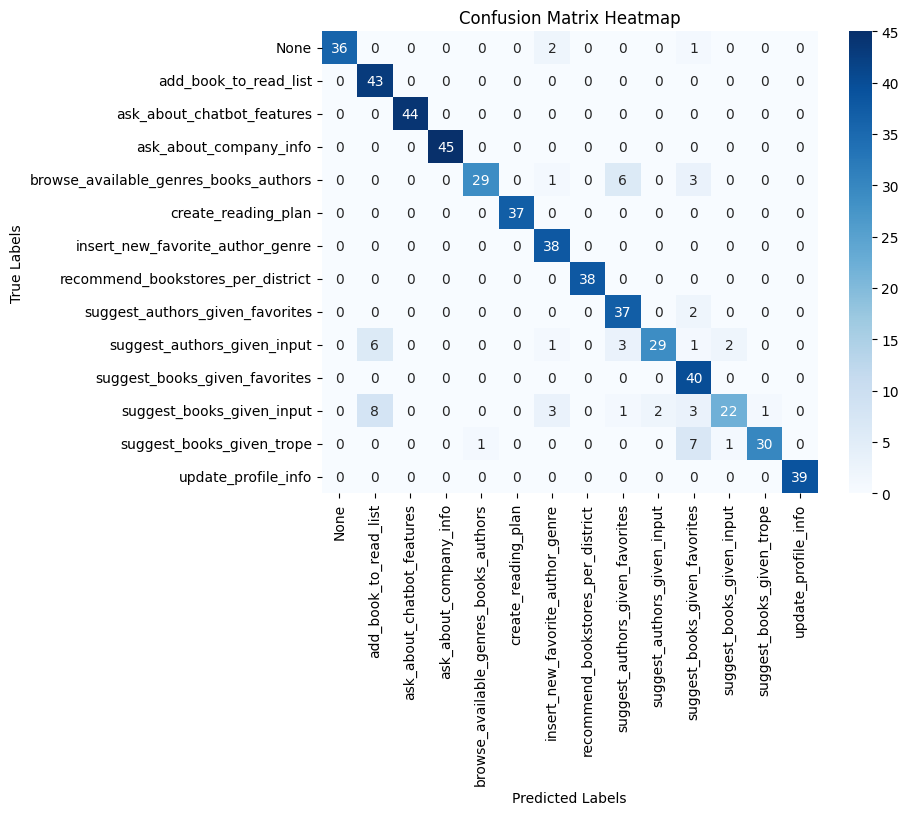

In [14]:
labels = sorted(set([y if y is not None else 'None' for y in y_train]))

# Compute confusion matrix
conf_matrix = confusion_matrix([y if y is not None else 'None' for y in y_train], [y if y is not None else 'None' for y in pred_train], labels=labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

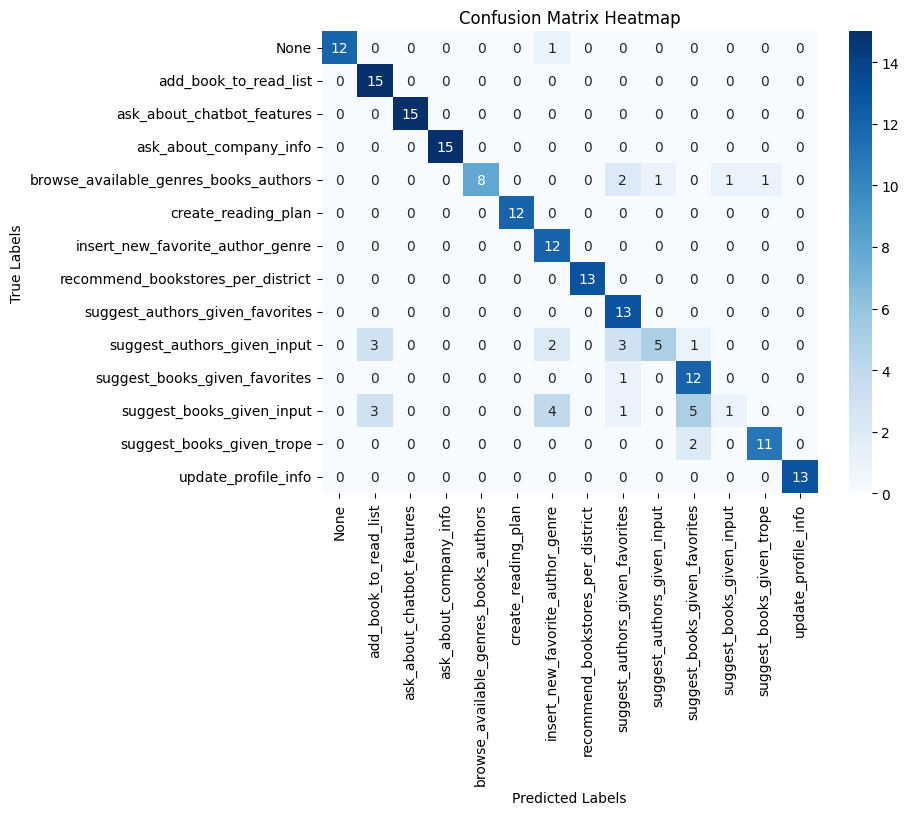

In [15]:
labels = sorted(set([y if y is not None else 'None' for y in y_test]))

# Compute confusion matrix
conf_matrix = confusion_matrix([y if y is not None else 'None' for y in y_test], [y if y is not None else 'None' for y in pred_test], labels=labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [16]:
hf_rl.to_json("layer.json")

2024-12-29 16:50:41 INFO semantic_router.utils.logger Saving route config to layer.json
